In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784') # returns a dict containing various key and value pairs
mnist ["frame"]
mnist["data"] = mnist["frame"].drop(columns = "class")

In [2]:
X_data , Y_data = mnist['data'].values , mnist["target"].values
print(X_data.shape , Y_data.shape)

(70000, 784) (70000,)


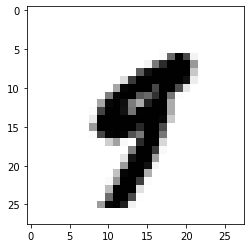

In [3]:
%matplotlib inline
import matplotlib

some_digit = X_data[36000]
some_digit_image = some_digit.reshape(28,28)

plt.imshow( some_digit_image , cmap = matplotlib.cm.binary , interpolation = "nearest")
plt.show()




In [4]:
Y_data[36000]

'9'

SPLIT DATASET

In [5]:
x_train , y_train , x_test , y_test = X_data[:60000] , Y_data[:60000] , X_data[60000:] , Y_data[60000:]

In [6]:
shuffled_indices = np.random.permutation(60000)
X_TRAIN , Y_TRAIN = x_train[shuffled_indices] , y_train[shuffled_indices]

In [7]:
Y_TRAIN

['7', '0', '4', '9', '2', ..., '3', '5', '2', '3', '9']
Length: 60000
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [8]:
Y_TRAIN == "5"

array([False, False, False, ..., False, False, False])

In [9]:
Y_TRAIN_5 = (Y_TRAIN=="5")
Y_TEST_5 = (y_test == "5")
Y_TRAIN_5

array([False, False, False, ..., False, False, False])

ALTERNATIVE METHOD FOR SPILITTING DATASET

In [10]:
shuffled_indices = np.random.permutation(70000)
train_indices , test_indices = shuffled_indices[:60000] , shuffled_indices[60000:]
X_train , Y_train , X_test , Y_test = X_data[train_indices] , Y_data[train_indices] , X_data[test_indices] , Y_data[test_indices]
X_train.shape , Y_train.shape , X_test.shape , Y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [11]:
Y_train_5 = (Y_train == "5")
Y_test_5 = (Y_test == "5")
Y_train_5

array([False, False, False, ..., False, False, False])

In [12]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
np.unique(Y_train_5)

array([False,  True])

USING SKLEARN FUNCTION TO SPLIT DATASET

In [14]:
from sklearn.model_selection import train_test_split

train_set , test_set = train_test_split( mnist["frame"] , test_size = 0.2 , random_state = 42)

train_input , train_label = (train_set.drop(columns = "class")).values , train_set["class"].values 
test_input , test_label = (test_set.drop(columns = "class")).values , test_set["class"].values

train_label_5 = (train_label == "5")
test_label_5 = (test_label == "5")

In [15]:
train_label_5

array([ True, False, False, ..., False, False, False])

In [16]:
train_input

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**TRAINING BINARY CLASSIFIER**

ON FIRST DATASET





In [20]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train , Y_train_5)

SGDClassifier(random_state=42)

In [21]:
predicted_labels = sgd_clf.predict(X_train)
actual_labels = Y_train_5

In [22]:
np.unique(predicted_labels == actual_labels )

array([False,  True])

In [23]:
from sklearn.metrics import precision_score , recall_score

#precision = precision_score( actual_labels , predicted_labels )
#precision

In [24]:
recall = recall_score( actual_labels , predicted_labels )
recall

0.8769628671716239

In [25]:
test_predicted_labels = sgd_clf.predict( X_test )
test_predicted_labels

array([False,  True, False, ..., False, False, False])

In [26]:
precision_score( Y_test_5 , test_predicted_labels)

0.7064721969006381

In [27]:
recall_score( Y_test_5 , test_predicted_labels )

0.8611111111111112

ON SECOND DATASET

In [28]:
SGD_CLF = SGDClassifier(random_state = 42)
SGD_CLF.fit(X_TRAIN , Y_TRAIN_5)

SGDClassifier(random_state=42)

In [29]:
PREDICT_LABELS = SGD_CLF.predict(X_TRAIN)
ACTUAL_LABELS = Y_TRAIN_5

In [30]:
np.unique(PREDICT_LABELS == ACTUAL_LABELS)


array([False,  True])

In [31]:
PRECISION = precision_score( ACTUAL_LABELS , PREDICT_LABELS )
PRECISION

0.7545483061480552

In [32]:
RECALL = recall_score( ACTUAL_LABELS , PREDICT_LABELS )
RECALL

0.8874746356760745

In [33]:
Y_TEST_PREDICTIONS = sgd_clf.predict( x_test )

precision_score( Y_TEST_5 , Y_TEST_PREDICTIONS)

0.7247037374658158

In [34]:
recall_score( Y_TEST_5 , Y_TEST_PREDICTIONS )

0.8912556053811659

ON THIRD DATASET

In [35]:
SGD_Classifier = SGDClassifier(random_state = 42)
SGD_Classifier.fit( train_input , train_label_5)

SGDClassifier(random_state=42)

In [36]:
train_labels_predicted = SGD_Classifier.predict( train_input )
train_labels_predicted

array([ True, False,  True, ..., False, False, False])

In [37]:
precision_score ( train_label_5 , train_labels_predicted )

0.9200968523002422

In [38]:
recall_score( train_label_5 , train_labels_predicted )

0.753968253968254

In [39]:
test_labels_predicted = SGD_Classifier.predict( test_input )
test_labels_predicted

array([False, False,  True, ..., False, False, False])

In [40]:
precision_score( test_label_5 , test_labels_predicted)

0.8977055449330784

In [41]:
recall_score( test_label_5 , test_labels_predicted)

0.7376276512175962

Since Third Dataset is performing quite well therfore we will continue our further analysis with the third dataset

**PERFORMANCE MEASURES**

In [42]:
from sklearn.model_selection  import cross_val_score
cv_score = cross_val_score( SGD_Classifier , train_input , train_label_5 , cv = 3 , scoring = "accuracy" )
cv_score 


array([0.97192907, 0.96855413, 0.96024858])

In [43]:
cv_score.mean()

0.9669105953211604

In [44]:
cv_score.std()

0.004908114885438201

In [45]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
  def fit(self , X , Y):
    pass
  
  def predict(self , X):
    return np.zeros(len(X) , dtype = "bool")

never5clf = Never5Classifier()
cv_score_1 = cross_val_score( never5clf , train_input , train_label_5 , cv = 3 , scoring = "accuracy")
cv_score_1


array([0.91107302, 0.90914448, 0.90978249])

Cross Validation using accuracy is not generally the best preferred performance measure for classifiers where one class has much more frequency than that of other classes.

*CONFUSION MATRIX*

In [46]:
from sklearn.model_selection import cross_val_predict
y_folds_predict = cross_val_predict( SGD_Classifier , train_input , train_label_5 , cv = 3)
y_folds_predict

array([ True, False,  True, ..., False, False, False])

In [47]:
train_label_5

array([ True, False, False, ..., False, False, False])

In [48]:
from sklearn.metrics import confusion_matrix
mapping_arr = confusion_matrix(train_label_5 , y_folds_predict)
mapping_arr

array([[50287,   673],
       [ 1180,  3860]])

In [49]:
precision = 3860/(673+3860)
recall = 3860/(1180+3860)

In [50]:
[precision , recall]

[0.8515332009706597, 0.7658730158730159]

In [51]:
from sklearn.metrics import precision_score , recall_score , f1_score
precision = precision_score(train_label_5 , y_folds_predict)
recall = recall_score(train_label_5 , y_folds_predict)
F1_score = f1_score(train_label_5 , y_folds_predict)

In [52]:
[precision , recall , F1_score]

[0.8515332009706597, 0.7658730158730159, 0.8064347644416588]

*PRECISION/RECALL TRADEOFF*

In [53]:
Y_Score = SGD_Classifier.decision_function(train_input)
Y_Score

array([  1944.72121115, -11130.72498734,    142.09803768, ...,
        -7258.76536852, -10923.36931462, -16728.49263389])

In [54]:
train_label_5

array([ True, False, False, ..., False, False, False])

In [55]:
threshhold = 150
greater_than_threshhold = np.array((Y_Score>threshhold) , dtype = "bool")
greater_than_threshhold

array([ True, False, False, ..., False, False, False])

In [56]:
f1_score(train_label_5 , greater_than_threshhold)

0.8240995704372729

In [57]:
decision_scores = cross_val_predict( SGD_Classifier , train_input , train_label_5 , cv = 3 , method = "decision_function")
decision_scores

array([  2620.11888047, -21468.63800421,    732.41439205, ...,
        -9619.64253191, -12620.86414512, -14196.89329626])

In [58]:
decision_scores.min() , decision_scores.max()

(-144688.24557611148, 46403.393811224094)

In [59]:
from sklearn.metrics import precision_recall_curve
precision , recall , threshholds = precision_recall_curve( train_label_5 , decision_scores)

In [60]:
threshholds.shape , precision.shape

((55987,), (55988,))

In [61]:
train_label_5.shape

(56000,)

(0.0, 1.05)

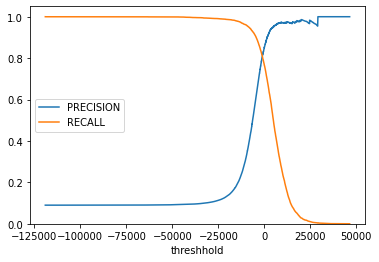

In [62]:
plt.plot(threshholds , precision[:-1] ,label = "PRECISION")
plt.plot( threshholds , recall[:-1] , label = "RECALL")
plt.xlabel("threshhold")
plt.legend(loc = "center left")
plt.ylim([0,1.05])


Text(0, 0.5, 'precision')

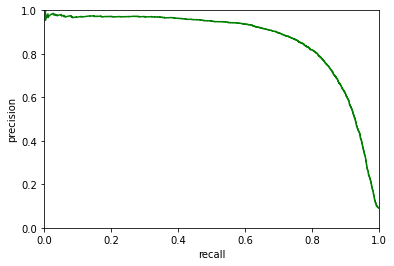

In [63]:
plt.plot(recall , precision , "g")
plt.ylim([0,1])
plt.xlim([0,1])
plt.xlabel("recall")
plt.ylabel("precision")

*ROC CURVE*

In [64]:
from sklearn.metrics import roc_curve
fpr , tpr , threshhold = roc_curve(train_label_5 , decision_scores)

Text(0, 0.5, 'FALSE POSITIVE RATE')

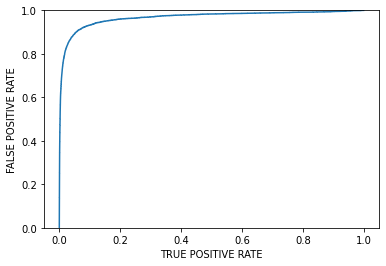

In [65]:
plt.plot(fpr , tpr )
plt.ylim([0,1])
#plt.xlim([0,1])
plt.xlabel("TRUE POSITIVE RATE")
plt.ylabel("FALSE POSITIVE RATE")


In [66]:
from sklearn.metrics import roc_auc_score
roc_auc_score(train_label_5 , decision_scores)


0.9672937302210262

*RANDOM FOREST CLASSIFIER*

In [67]:
from sklearn.ensemble import RandomForestClassifier as RFC
forest_clf = RFC()
forest_clf.fit(train_input , train_label_5)


RandomForestClassifier()

In [68]:
predictions_train = forest_clf.predict(train_input)
predictions_train

array([ True, False, False, ..., False, False, False])

In [69]:
labels_train = train_label_5
labels_train

array([ True, False, False, ..., False, False, False])

In [70]:
confusion_matrix(labels_train , predictions_train)

array([[50960,     0],
       [    0,  5040]])

In [71]:
tpr_train = 1.0
fpr_train = 0.0

In [72]:
precision_score(labels_train , predictions_train)

1.0

In [73]:
recall_score(labels_train , predictions_train)

1.0

In [74]:
f1_score(labels_train , predictions_train)

1.0

In [75]:
predictions_test = forest_clf.predict(test_input)
predictions_test

array([False, False, False, ..., False, False, False])

In [76]:
labels_test = test_label_5
labels_test

array([False, False, False, ..., False, False, False])

In [77]:
confusion_matrix(labels_test , predictions_test)

array([[12722,     5],
       [  142,  1131]])

In [78]:
a = labels_test 
b =  predictions_test
[precision_score(a , b) , recall_score(a , b) , f1_score(a , b)]

[0.9955985915492958, 0.8884524744697565, 0.9389788293897883]

In [79]:
tpr_test = 1129/(1129+144)
fpr_test = 5/(12722+5)
[tpr_test , fpr_test]

[0.8868813825608798, 0.00039286556140488726]

In [80]:
proba_scores = cross_val_predict( forest_clf , train_input , train_label_5 , cv = 3 , method = "predict_proba")
proba_scores

array([[0.19, 0.81],
       [1.  , 0.  ],
       [0.99, 0.01],
       ...,
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.97, 0.03]])

In [81]:
fpr_forest  , tpr_forest  , threshholds_forest = roc_curve( train_label_5 , proba_scores[:,1])
threshholds_forest

array([2.  , 1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91,
       0.9 , 0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 ,
       0.79, 0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69,
       0.68, 0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58,
       0.57, 0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5 , 0.49, 0.48, 0.47,
       0.46, 0.45, 0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36,
       0.35, 0.34, 0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25,
       0.24, 0.23, 0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14,
       0.13, 0.12, 0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03,
       0.02, 0.01, 0.  ])

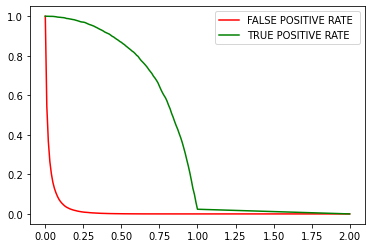

In [82]:
def plot_roc_curve(x , y, z):
  plt.plot(z,x , "r" , label = "FALSE POSITIVE RATE ")
  plt.plot(z,y , "g" , label = "TRUE POSITIVE RATE ")
  plt.legend()
  #plt.xlim([0,2])
  #plt.ylim([0,1])
  
plot_roc_curve(fpr_forest , tpr_forest , threshholds_forest)
plt.show()


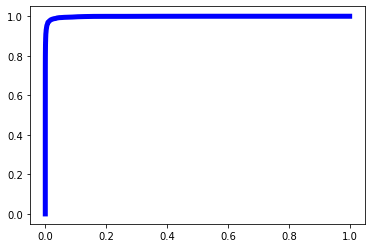

In [83]:
plt.plot(fpr_forest , tpr_forest , "b" , linewidth = 5)

In [84]:
roc_auc_score(train_label_5 , proba_scores[:,1])

0.9983006357304827

**MULTILABEL CLASSIFICATION**

In [85]:
train_features = train_input
train_digit = train_label
test_features = test_input
test_digit = test_label

SGD_Classifier.fit(train_features , train_digit)

SGDClassifier(random_state=42)

In [86]:
predicted_digits_train = SGD_Classifier.predict(train_features)
predicted_digits_train

array(['5', '8', '5', ..., '1', '0', '0'], dtype='<U1')

In [87]:
accuracy_matrix = confusion_matrix(train_digit , predicted_digits_train)
accuracy_matrix

array([[5084,    0,  108,   40,    3,   64,   37,    5,   47,  172],
       [   1, 6144,   41,   19,    0,    9,    8,    5,   29,   21],
       [   3,   36, 5085,  118,   23,   24,   66,   61,  158,   36],
       [   1,    8,  219, 4912,    2,  266,    7,   47,   62,  184],
       [   1,   29,  140,   19, 3964,   27,   76,  160,  150,  963],
       [  16,   19,   78,  115,   11, 4312,   87,   33,  176,  193],
       [  14,    8,   65,   16,    4,   75, 5245,    6,   38,    9],
       [   7,   23,   72,   31,   12,    4,    4, 5418,   12,  207],
       [   8,   66,  129,  196,    2,  199,   49,   36, 4319,  464],
       [   4,   18,   54,   64,   19,   38,    4,  263,   33, 5041]])

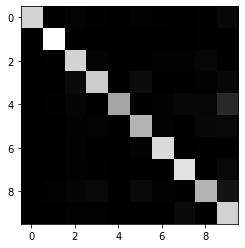

In [88]:
plt.imshow(accuracy_matrix , cmap = plt.cm.gray)

In [89]:
predicted_digits_test = SGD_Classifier.predict(test_features)
predicted_digits_test

array(['8', '4', '5', ..., '8', '7', '1'], dtype='<U1')

In [90]:
test_digit

['8', '4', '8', '7', '7', ..., '3', '5', '2', '7', '1']
Length: 14000
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [91]:
test_arr = confusion_matrix(test_digit , predicted_digits_test)

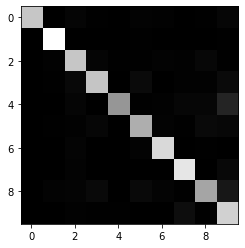

In [92]:
plt.imshow(test_arr , cmap = plt.cm.gray)

In [93]:
scores_array = SGD_Classifier.decision_function(train_features)
feature_1_scores = scores_array[0,:]

In [94]:
np.max(feature_1_scores)

2937.8801813654063

In [95]:
SGD_Classifier.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1')

In [96]:
cross_val_score(SGD_Classifier , train_features , train_digit , cv = 3 , scoring = "accuracy")

array([0.84212782, 0.87416296, 0.83129755])

*RANDOM FOREST CLASSIFIER*

In [97]:
from sklearn.ensemble import RandomForestClassifier as RFC
forest_Classifier = RFC()
forest_Classifier.fit(train_features , train_digit)

RandomForestClassifier()

In [98]:
predicted_digits = forest_Classifier.predict(train_features)
print(train_digit , predicted_digits)

['5', '4', '8', '0', '2', ..., '6', '6', '1', '0', '0']
Length: 56000
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9'] ['5' '4' '8' ... '1' '0' '0']


In [99]:
predict_digits_test = forest_Classifier.predict(test_features)
print( test_digit , predict_digits_test)

['8', '4', '8', '7', '7', ..., '3', '5', '2', '7', '1']
Length: 14000
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9'] ['8' '4' '8' ... '2' '7' '1']


In [100]:
# accuracy matrix on training set
confusion_matrix( train_digit , predicted_digits)

array([[5560,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 6277,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 5610,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 5708,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 5529,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 5040,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 5480,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 5790,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 5468,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 5538]])

In [101]:
# accuracy matrix on test set
confusion_matrix( test_digit , predict_digits_test)

array([[1324,    0,    5,    0,    2,    2,    4,    1,    5,    0],
       [   0, 1579,    7,    6,    2,    1,    0,    2,    2,    1],
       [   2,    3, 1337,    4,    5,    2,    7,   10,    8,    2],
       [   1,    1,   23, 1359,    0,    9,    1,   14,   15,   10],
       [   2,    0,    4,    0, 1257,    0,    3,    3,    1,   25],
       [   2,    5,    2,   18,    3, 1221,    8,    2,   11,    1],
       [   5,    1,    0,    0,    6,    9, 1371,    0,    4,    0],
       [   2,    8,   17,    0,    8,    1,    0, 1448,    4,   15],
       [   1,    9,    8,   11,    6,    8,    4,    5, 1296,    9],
       [   6,    5,    5,   14,   17,    5,    1,    8,    7, 1352]])

In [102]:
proba_arr = forest_Classifier.predict_proba(train_features)
proba_arr[0,:]

array([0.  , 0.  , 0.  , 0.05, 0.  , 0.91, 0.03, 0.  , 0.  , 0.01])

In [103]:
forest_Classifier.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [104]:
cross_val_score( forest_Classifier , train_features , train_digit , cv = 3 , scoring = "accuracy")

array([0.96566133, 0.96785772, 0.96571306])

In [105]:
cross_val_score(forest_Classifier , test_features , test_digit , cv = 3 , scoring = "accuracy")

array([0.94536105, 0.9427898 , 0.9449207 ])

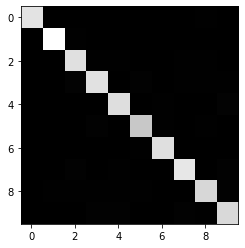

In [107]:
y_predicted = cross_val_predict( forest_Classifier , train_features , train_digit , cv = 3 )
error_mat = confusion_matrix(train_digit , y_predicted)
plt.imshow(error_mat , cmap = plt.cm.gray)

In [108]:
error_mat

array([[5487,    1,    3,    1,    4,    7,   20,    0,   34,    3],
       [   1, 6176,   33,   13,   12,    5,    8,   11,   11,    7],
       [  23,    8, 5426,   28,   27,    1,   19,   39,   33,    6],
       [   5,    9,   78, 5434,    4,   55,    5,   43,   46,   29],
       [   8,   10,   11,    1, 5360,    0,   27,    7,   16,   89],
       [  22,    7,    7,   58,   10, 4837,   41,    6,   31,   21],
       [  22,   12,    4,    1,    7,   33, 5382,    0,   19,    0],
       [   5,   17,   64,    6,   34,    1,    0, 5588,    9,   66],
       [  15,   32,   27,   44,   26,   41,   22,    3, 5201,   57],
       [  23,   12,   11,   71,   69,   16,    3,   49,   39, 5245]])

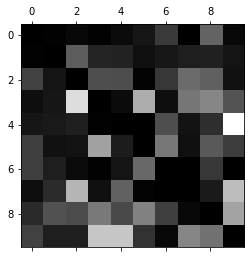

In [109]:
row_sums = error_mat.sum(axis = 1 )
conf_mat = error_mat/row_sums
np.fill_diagonal(conf_mat , 0)
plt.matshow(conf_mat , cmap = plt.cm.gray)
plt.show()

In [110]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

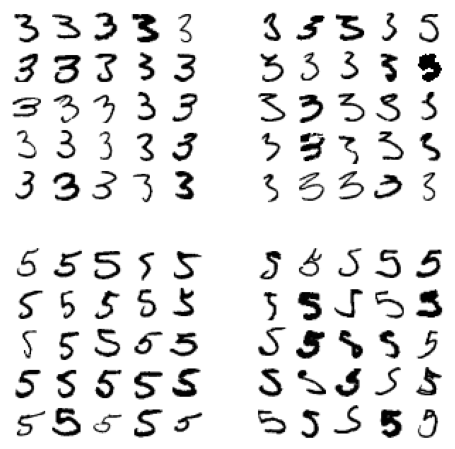

In [111]:
a , b = 3 , 5 
X_aa = train_features[(train_digit == "3") & (y_predicted == "3")]
X_ab = train_features[(train_digit == "3") & (y_predicted == "5")]
X_bb = train_features[(train_digit == "5") & (y_predicted == "5")]
X_ba = train_features[(train_digit == "5") & (y_predicted == "3")]
plt.figure(figsize = (8,8))
plt.subplot(221) ;
plot_digits(X_aa[:25] , images_per_row = 5)
plt.subplot(222) ;
plot_digits(X_ab[:25] , images_per_row = 5)
plt.subplot(223) ;
plot_digits(X_bb[:25] , images_per_row = 5)
plt.subplot(224) ;
plot_digits(X_ba[:25] , images_per_row = 5)
plt.show()